![](https://images.pexels.com/photos/356807/pexels-photo-356807.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

# Apriltag Camera Calibration Target

Kevin J. Walchko, Phd

18 July 2020

---

A checkerboard target is one of the best calibration target for a camera. The problem becomes, you need to fit the entire target into the image. This leads to the edges not getting a large sampling and the point *coverage* mainly being in the center of the image (camera FOV).

There are many types of tags out there with various benefits and detractors. Here we are focusing on Apriltags and going to build a camera calibration board with them.

![](tags.png)



## References

- Rosebrock: [Find distance from camera to object/marker using Python and OpenCV](https://www.pyimagesearch.com/2015/01/19/find-distance-camera-objectmarker-using-python-opencv/)
- [iPhone Calibration](https://medium.com/@tomas789/iphone-calibration-camera-imu-and-kalibr-33b8645fb0aa)

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

# plotting
%matplotlib inline 

In [88]:
import numpy as np
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)

from matplotlib import pyplot as plt
import pylab                                 
pylab.rcParams['figure.figsize'] = (10.0, 18.0)

# from pupil_apriltags import Detector # find apriltags
import moms_apriltag as apt          # draw board
from opencv_camera import ApriltagTargetFinder
from opencv_camera import ApriltagMarker # draw found tags
from opencv_camera import bgr2gray
from opencv_camera import visualizeTargetDetections

import imageio # read/write images

In [80]:
from pupil_apriltags import Detector

## Calibration Target

Generate a target board for printing. Make sure to attach it to a flat surface for optimal performance.

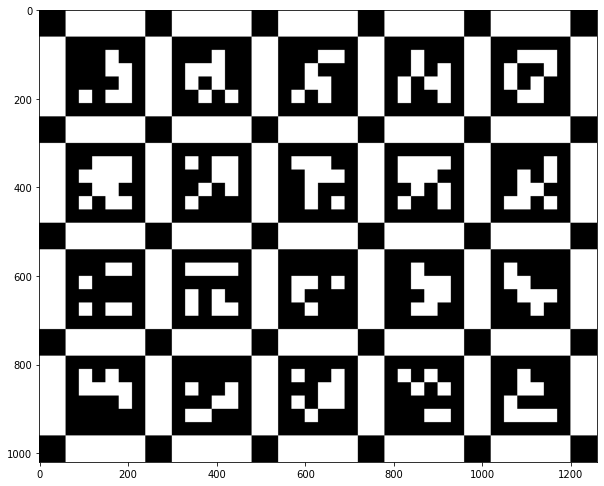

In [90]:
shape = (4,5)
tag_family = "tag16h5"
imxx = apt.board(shape,tag_family,30)

plt.imshow(imxx, cmap="gray");

# save it
# imageio.imwrite("target-tag16h5.png", imxx)

In [103]:
d = Detector(families=tag_family,
        nthreads=1,
        quad_decimate=1.0,
        quad_sigma=0.0,
        refine_edges=1,
        decode_sharpening=0.25,
        debug=0)

tags = d.detect(
    imxx, 
    estimate_tag_pose=False, 
    camera_params=None, tag_size=0.05)

# since our target is 6*8, we should get 48 tags found
print(f">> {len(tags)}")

# let's look at one tag ... doesn't matter which one
print(tags[1])

>> 20
Detection object:
tag_family = b'tag16h5'
tag_id = 1
hamming = 0
decision_margin = 113.33333587646484
homography = [[ 90.1   0.3 390. ]
 [  0.   90.3 150.1]
 [  0.    0.    1. ]]
center = [390.  150.1]
corners = [[299.9 240.1]
 [479.9 240.1]
 [480.2  59.9]
 [299.9  59.9]]
pose_R = None
pose_t = None
pose_err = None



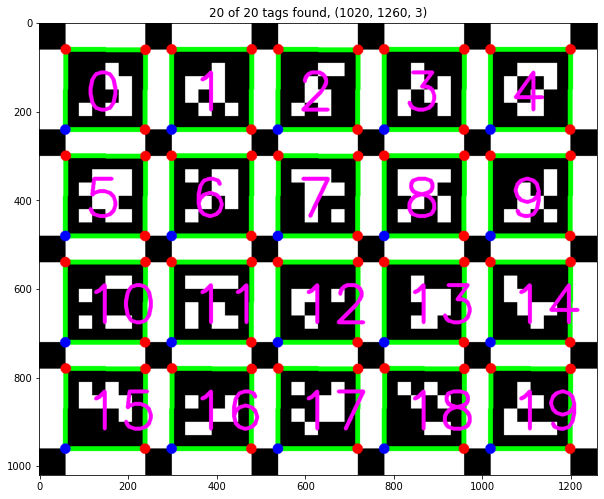

In [104]:
tm = ApriltagMarker()

pp = tm.draw(imxx, tags, id=True, mark=False)
plt.imshow(pp)
plt.title(f"{len(tags)} of {shape[0]*shape[1]} tags found, {pp.shape}");

## Target Finder

In [105]:
tf = ApriltagTargetFinder(d,shape,0.05)
ok, imgpts, objpts = tf.find(imxx)
print(ok)

True


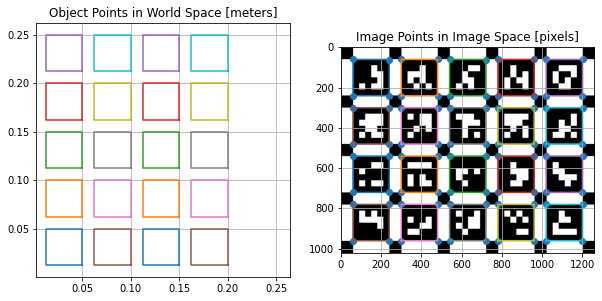

In [106]:
if ok:
    visualizeTargetDetections(objpts, imgpts, imxx)
else:
    print("ERROR: no tags found")